In [2]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('abalone_weka_dataset (1).csv')  

In [14]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [15]:
df.length.value_counts()

0.625    94
0.550    94
0.575    93
0.580    92
0.620    87
         ..
0.150     1
0.110     1
0.135     1
0.800     1
0.815     1
Name: length, Length: 134, dtype: int64

In [18]:
df.diameter.value_counts()

0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.615      1
0.620      1
0.625      1
0.090      1
0.095      1
Name: diameter, Length: 111, dtype: int64

In [19]:
df.height.value_counts()

0.150    266
0.140    220
0.155    217
0.175    211
0.160    203
0.125    202
0.165    192
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    130
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     76
0.080     75
0.085     74
0.200     68
0.075     59
0.070     47
0.205     45
0.065     39
0.215     30
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.235      6
0.035      6
0.025      5
0.240      4
0.250      3
0.000      2
0.015      2
0.020      2
0.515      1
1.130      1
0.010      1
Name: height, dtype: int64

In [20]:
df.whole_weight.value_counts()

0.2225    8
0.4775    7
1.1345    7
0.1960    7
0.9700    7
         ..
0.7270    1
1.2110    1
0.0425    1
1.6750    1
2.2385    1
Name: whole_weight, Length: 2425, dtype: int64

In [21]:
df.shucked_weight.value_counts()

0.1750    11
0.2505    10
0.0960     9
0.2025     9
0.4190     9
          ..
0.0070     1
0.2180     1
0.7440     1
0.6995     1
0.9165     1
Name: shucked_weight, Length: 1513, dtype: int64

In [22]:
df.viscera_weight.value_counts()

0.1715    15
0.1960    14
0.2195    13
0.0610    13
0.0575    13
          ..
0.3710     1
0.4505     1
0.4365     1
0.5190     1
0.4460     1
Name: viscera_weight, Length: 880, dtype: int64

In [23]:
df.shell_weight.value_counts()

0.2750    43
0.2500    42
0.1850    40
0.3150    40
0.2650    40
          ..
0.1880     1
0.7975     1
0.4135     1
0.6900     1
0.2945     1
Name: shell_weight, Length: 926, dtype: int64

In [24]:
df.rings.value_counts()

9.0     689
10.0    634
8.0     567
11.0    487
7.0     391
12.0    267
6.0     259
13.0    203
14.0    126
5.0     115
15.0    103
16.0     67
17.0     58
4.0      57
18.0     42
19.0     32
20.0     26
3.0      15
21.0     14
23.0      9
22.0      6
27.0      2
24.0      2
1.0       1
26.0      1
2.0       1
29.0      1
25.0      1
Name: rings, dtype: int64

In [ ]:
df.shape

(4177, 9)

In [ ]:
df.columns  

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [ ]:
df.head(6)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,NaN,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4176 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4166 non-null   float64
 4   whole_weight    4165 non-null   float64
 5   shucked_weight  4157 non-null   float64
 6   viscera_weight  4168 non-null   float64
 7   shell_weight    4170 non-null   float64
 8   rings           4176 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


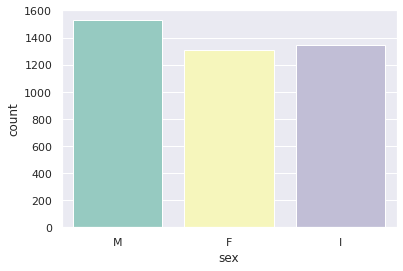

In [ ]:
sns.countplot(x = 'sex', data = df, palette="Set3")

In [ ]:
df.isna().sum()

sex                0
length             1
diameter           0
height            11
whole_weight      12
shucked_weight    20
viscera_weight     9
shell_weight       7
rings              1
dtype: int64

Removing missing values

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [ ]:
df['sex'] = df['sex'].replace(to_replace=['M','F','I'],value=[0,1,2])

In [ ]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [ ]:
X = df.drop('rings', axis = 1).values
y = df['rings'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

accuracy:  0.26779935275080907
Training Score:  0.2882414151925078
Testing Score:  0.26779935275080907


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

accuracy:  0.2621359223300971
Training Score:  0.34200485605272285
Testing Score:  0.2621359223300971


In [ ]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
    A=accuracy_score(y_predi,y_test)
print("accuracy: ",A)

  

accuracy:  0.24757281553398058


In [ ]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

accuracy:  0.24190938511326862
Training Score:  0.3232743669788415
Testing Score:  0.24190938511326862


In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

accuracy:  0.24676375404530745
Training Score:  0.3139091224419008
Testing Score:  0.24676375404530745


In [ ]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

accuracy:  0.2580906148867314
Training Score:  0.3291710024280264
Testing Score:  0.2580906148867314


In [ ]:
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
adb_train_acc = adb.score(X_train, y_train) 
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

accuracy:  0.21763754045307443
Training Score:  0.21401318071453349
Testing Score:  0.21763754045307443


In [ ]:
gdb = GradientBoostingClassifier(n_estimators= 200, max_depth = 2, min_samples_leaf= 2)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
gdb_train_acc = gdb.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

accuracy:  0.24433656957928804
Training Score:  0.6160249739854319
Testing Score:  0.24433656957928804


In [ ]:
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 100, max_depth = 3, subsample = 0.8, colsample_bytree = 0.6, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
xgb_train_acc = xgb.score(X_train, y_train) 
print('Training Score: ', xgb_train_acc)
xgb_test_acc = xgb.score(X_test, y_test)
print('Testing Score: ', xgb_test_acc)

accuracy:  0.2580906148867314
Training Score:  0.5102323968088797
Testing Score:  0.2580906148867314


In [ ]:

import plotly.graph_objs as go
import plotly.offline as py
x = ['Logistic Regression','SVC', 'KNN', 'Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost']
y1 = [lr_train_acc, svc_train_acc, knn_train_acc, dt_train_acc, rf_train_acc, adb_train_acc, gdb_train_acc, xgb_train_acc]
y2 = [lr_test_acc, svc_test_acc, knn_test_acc, dt_test_acc, rf_test_acc, adb_test_acc, gdb_test_acc, xgb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

filling mean in missing values

In [ ]:
df=pd.read_csv('abalone_weka_dataset (1).csv') 

In [ ]:
df.isna().sum()

sex                0
length             1
diameter           0
height            11
whole_weight      12
shucked_weight    20
viscera_weight     9
shell_weight       7
rings              1
dtype: int64

In [ ]:
df['length'].fillna(df['length'].mean(),inplace=True)
df['height'].fillna(df['height'].mean(),inplace=True)
df['whole_weight'].fillna(df['whole_weight'].mean(),inplace=True)
df['shucked_weight'].fillna(df['shucked_weight'].mean(),inplace=True)
df['viscera_weight'].fillna(df['viscera_weight'].mean(),inplace=True)
df['shell_weight'].fillna(df['shell_weight'].mean(),inplace=True)
df['rings'].fillna(df['rings'].mean(),inplace=True)

In [ ]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [ ]:
df['sex'] = df['sex'].replace(to_replace=['M','F','I'],value=[0,1,2])

In [ ]:
X = df.drop('rings', axis = 1).values
y = df['rings'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


with knnimputer to fill missing values

In [ ]:
df=pd.read_csv('abalone_weka_dataset (1).csv')  

In [ ]:
df.shape   #printing the dimensions

(4177, 9)

In [ ]:
df.columns  #printing names of the columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [ ]:
df.head(6)   #printing first 6 rows

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,NaN,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8.0


In [ ]:
df.info()   #printing details of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4176 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4166 non-null   float64
 4   whole_weight    4165 non-null   float64
 5   shucked_weight  4157 non-null   float64
 6   viscera_weight  4168 non-null   float64
 7   shell_weight    4170 non-null   float64
 8   rings           4176 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
df.isna().sum()     #checking for Na values

sex                0
length             1
diameter           0
height            11
whole_weight      12
shucked_weight    20
viscera_weight     9
shell_weight       7
rings              1
dtype: int64

In [ ]:
df=pd.get_dummies(df, columns=["sex"])
df.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings', 'sex_F', 'sex_I', 'sex_M'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
df1=pd.read_csv('abalone_weka_dataset (1).csv')  

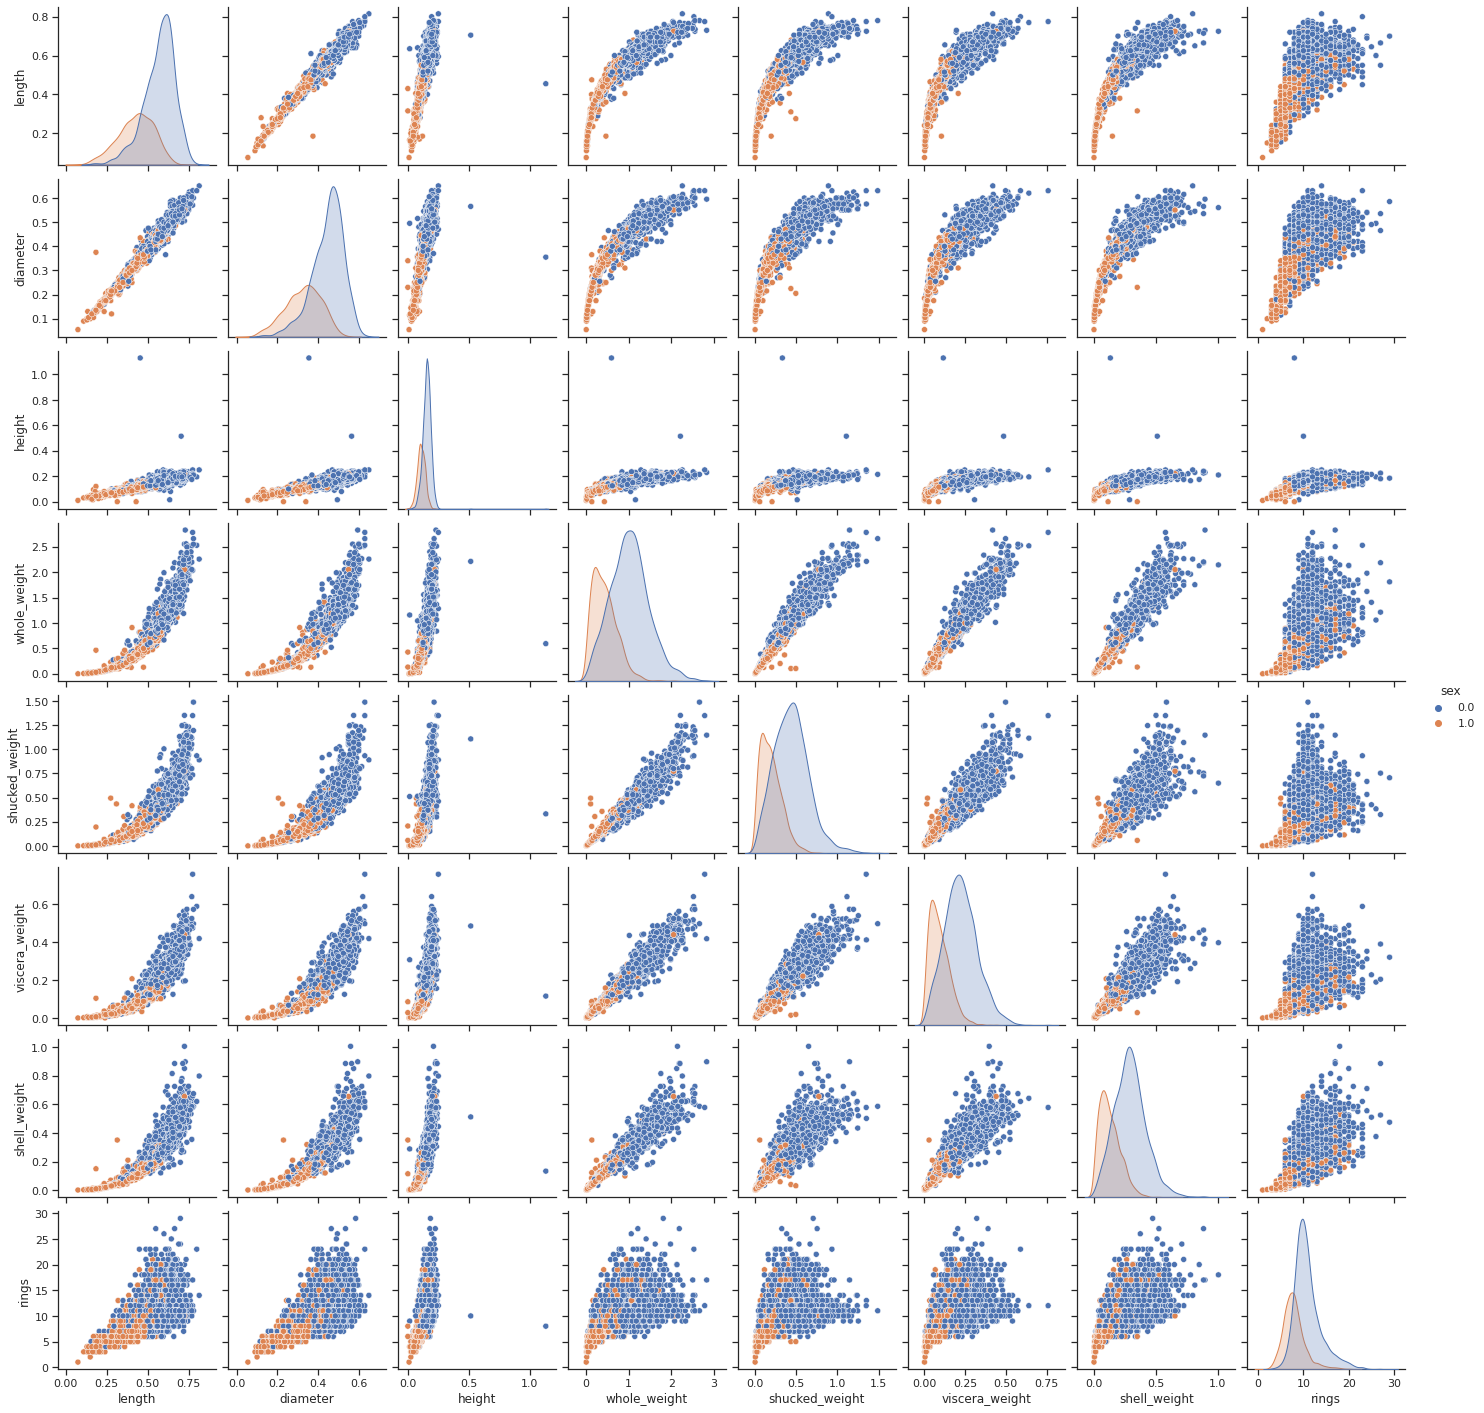

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df1,hue='sex',diag_kind='kde')
plt.show()

In [ ]:
df['sex'].value_counts() 

0.0    2835
1.0    1342
Name: sex, dtype: int64

In [ ]:
#Detecting outliers

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 2, eps = 0.3)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

35

In [ ]:
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1618,0.210,9.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.0,1.0,0.0


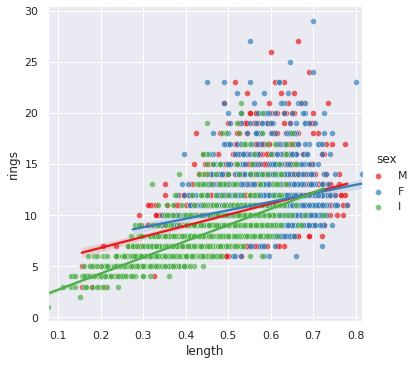

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(x = 'length', y = 'rings', data = df1, hue = 'sex', palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
#Removing outliers based on length column
df.drop(df[(df['length']<0.1) & (df['rings'] < 5)].index, inplace=True)
df.drop(df[(df['length']<0.8) & (df['rings'] > 25)].index, inplace=True)
df.drop(df[(df['length']>=0.8) & (df['rings']< 25)].index, inplace=True)

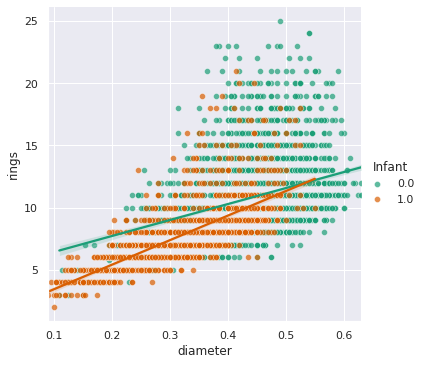

In [ ]:
sns.lmplot(x = 'diameter', y = 'rings', data = df1, hue = 'sex', palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
#Removing outliers based on diameter column
df.drop(df[(df['diameter']<0.1) & (df['rings'] < 5)].index, inplace=True)
df.drop(df[(df['diameter']<0.6) & (df['rings'] > 25)].index, inplace=True)
df.drop(df[(df['diameter']>=0.6) & (df['rings']< 25)].index, inplace=True)

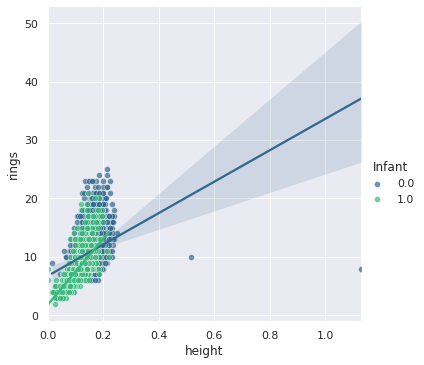

In [ ]:
sns.lmplot(x = 'height', y = 'rings', data = df, hue = 'sex', palette = 'viridis', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})


In [ ]:
##Removing outliers based on height column
df.drop(df[(df['height']>0.4) & (df['rings'] < 15)].index, inplace=True)
df.drop(df[(df['height']<0.4) & (df['rings'] > 25)].index, inplace=True)

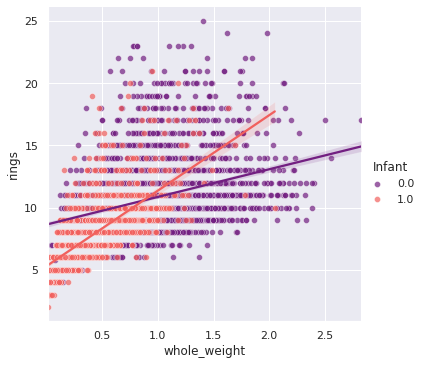

In [ ]:
sns.lmplot(x = 'whole_weight', y = 'rings', data = df, hue = 'Infant', palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
##Removing outliers based on whole_weight column
df.drop(df[(df['whole_weight']>= 2.5) & (df['rings'] < 25)].index, inplace=True)
df.drop(df[(df['whole_weight']<2.5) & (df['rings'] > 25)].index, inplace=True)

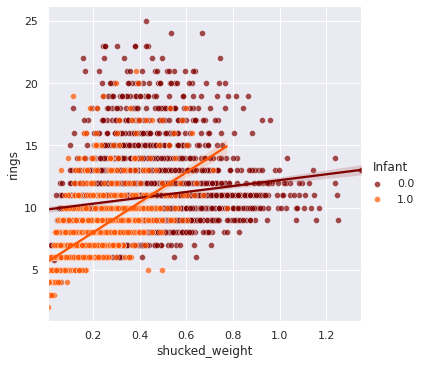

In [ ]:
sns.lmplot(x = 'shucked_weight', y = 'rings', data = df, hue = 'Infant', palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['shucked_weight']>= 1) & (df['rings'] < 20)].index, inplace=True)
df.drop(df[(df['shucked_weight']<1) & (df['rings'] > 20)].index, inplace=True)

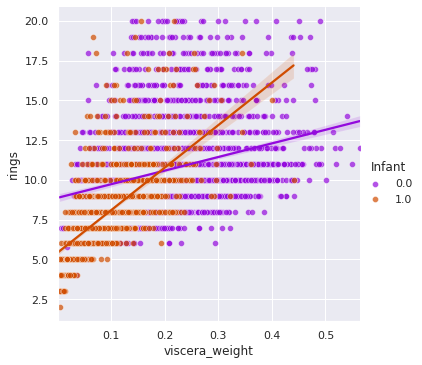

In [ ]:
sns.lmplot(x = 'viscera_weight', y = 'rings', data = df, hue = 'Infant', palette = 'gnuplot', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['viscera_weight']> 0.5) & (df['rings'] < 20)].index, inplace=True)
df.drop(df[(df['viscera_weight']<0.5) & (df['rings'] > 25)].index, inplace=True)

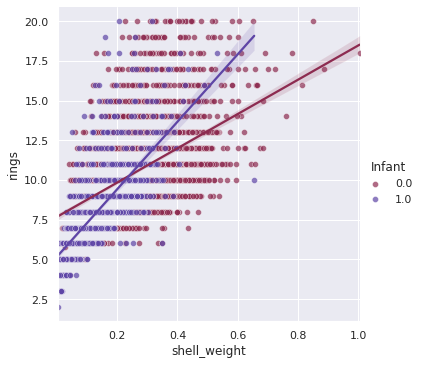

In [ ]:
sns.lmplot(x = 'shell_weight', y = 'rings', data = df, hue = 'Infant', palette = 'twilight_r', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['shell_weight']> 0.6) & (df['rings'] < 25)].index, inplace=True)
df.drop(df[(df['shell_weight']<0.8) & (df['rings'] > 25)].index, inplace=True)

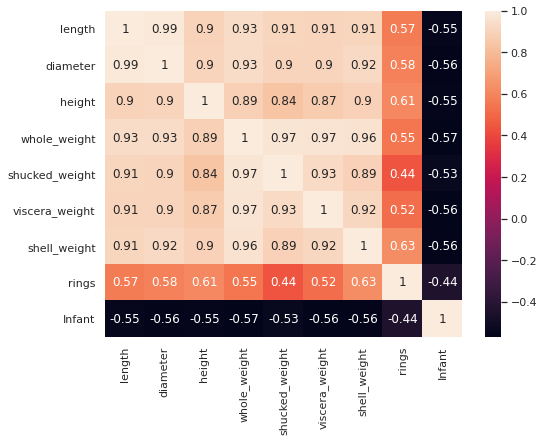

In [ ]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

Removing high correlated variables

In [ ]:
#Based on the correlation analysis, removing the columns of diameter and whole_weight
df.drop('whole_weight',axis=1,inplace=True)
df.drop('diameter',axis=1,inplace=True)

In [ ]:
Rings = []
for i in df['rings']:
    if i <= 8.0:
        Rings.append('2')
    elif i<=14.0 and i>8.0 :
        Rings.append('1')
    else :
        Rings.append('0')

df['Rings'] = Rings
df.drop('rings', axis = 1, inplace = True)
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1618,0.210,1.0,0.0,0.0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,2


In [ ]:
df.drop('sex', axis = 1, inplace = True)
df.head()

,length,height,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.095,0.2245,0.1010,0.150,15.0
1,0.350,0.090,0.0995,0.0485,0.070,7.0
2,0.530,0.135,0.2565,0.1601,0.210,9.0
3,0.440,0.125,0.2155,0.1140,0.155,10.0
4,0.330,0.080,0.0895,0.0395,0.055,7.0


In [ ]:
df['Rings'].value_counts()

1    2339
2    1403
0     307
Name: Rings, dtype: int64

In [ ]:
df['rings'].mean()

9.76112620400099

In [ ]:
df_1 = df.copy()

In [ ]:
df_1['Rings'].value_counts()

1    2339
2    1403
0     307
Name: Rings, dtype: int64

In [ ]:
df_1['Rings'].value_counts()

1    2339
2    1403
0     307
Name: Rings, dtype: int64

In [ ]:
X = df.drop('Rings', axis = 1).values
y = df['Rings'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.13      0.20        98
           1       0.74      0.84      0.79       702
           2       0.75      0.70      0.72       415

    accuracy                           0.73      1215
   macro avg       0.64      0.56      0.57      1215
weighted avg       0.72      0.73      0.72      1215

Confusion Matrix: 
 [[ 13  84   1]
 [ 17 590  95]
 [  0 125 290]]
Training Score:  0.7734650670430487
Testing Score:  0.7349794238683127


In [ ]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.04      0.07        98
           1       0.73      0.88      0.80       702
           2       0.78      0.67      0.72       415

    accuracy                           0.74      1215
   macro avg       0.65      0.53      0.53      1215
weighted avg       0.72      0.74      0.71      1215

Confusion Matrix: 
 [[  4  93   1]
 [  5 619  78]
 [  0 137 278]]
Training Score:  0.7918136908962597
Testing Score:  0.7415637860082305


In [ ]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
A=accuracy_score(y_pred,y_test)
print("accuracy: ",A)
    


accuracy:  0.7415637860082305


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.72      0.89      0.80       702
           2       0.78      0.66      0.71       415

    accuracy                           0.74      1215
   macro avg       0.50      0.52      0.50      1215
weighted avg       0.68      0.74      0.70      1215

Confusion Matrix: 
 [[  0  97   1]
 [  1 623  78]
 [  0 142 273]]
Training Score:  0.778757939308398
Testing Score:  0.7374485596707819


In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.14      0.01      0.02        98
           1       0.70      0.92      0.80       702
           2       0.82      0.57      0.67       415

    accuracy                           0.73      1215
   macro avg       0.56      0.50      0.50      1215
weighted avg       0.70      0.73      0.69      1215

Confusion Matrix: 
 [[  1  96   1]
 [  6 647  49]
 [  0 180 235]]
Training Score:  0.7925194071983063
Testing Score:  0.7267489711934156


In [ ]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.72      0.89      0.79       702
           2       0.77      0.65      0.70       415

    accuracy                           0.73      1215
   macro avg       0.50      0.51      0.50      1215
weighted avg       0.68      0.73      0.70      1215

Confusion Matrix: 
 [[  0  97   1]
 [  0 622  80]
 [  0 145 270]]
Training Score:  0.7907551164431899
Testing Score:  0.7341563786008231


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train) 
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.22      0.28        98
           1       0.73      0.78      0.75       702
           2       0.70      0.69      0.70       415

    accuracy                           0.70      1215
   macro avg       0.60      0.56      0.58      1215
weighted avg       0.69      0.70      0.70      1215

Confusion Matrix: 
 [[ 22  72   4]
 [ 38 545 119]
 [  1 127 287]]
Training Score:  0.7674664784756527
Testing Score:  0.702880658436214


In [ ]:
gdb = GradientBoostingClassifier(n_estimators= 200, max_depth = 2, min_samples_leaf= 2)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.12      0.18        98
           1       0.73      0.86      0.79       702
           2       0.77      0.66      0.71       415

    accuracy                           0.73      1215
   macro avg       0.63      0.55      0.56      1215
weighted avg       0.71      0.73      0.71      1215

Confusion Matrix: 
 [[ 12  85   1]
 [ 20 602  80]
 [  0 140 275]]
Training Score:  0.8352152434721242
Testing Score:  0.731687242798354


In [ ]:
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 100, max_depth = 3, subsample = 0.8, colsample_bytree = 0.6, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
xgb_train_acc = xgb.score(X_train, y_train) 
print('Training Score: ', xgb_train_acc)
xgb_test_acc = xgb.score(X_test, y_test)
print('Testing Score: ', xgb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.10      0.17        98
           1       0.73      0.88      0.80       702
           2       0.79      0.65      0.72       415

    accuracy                           0.74      1215
   macro avg       0.66      0.55      0.56      1215
weighted avg       0.73      0.74      0.72      1215

Confusion Matrix: 
 [[ 10  87   1]
 [ 11 620  71]
 [  0 144 271]]
Training Score:  0.8129851799576571
Testing Score:  0.7415637860082305


In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
x = ['Logistic Regression','SVC', 'KNN', 'Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost']
y1 = [lr_train_acc, svc_train_acc, knn_train_acc, dt_train_acc, rf_train_acc, adb_train_acc, gdb_train_acc, xgb_train_acc]
y2 = [lr_test_acc, svc_test_acc, knn_test_acc, dt_test_acc, rf_test_acc, adb_test_acc, gdb_test_acc, xgb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)